######Dataset
######https://www.kaggle.com/bachrr/covid-chest-xray

In [ ]:
#Load required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline

In [ ]:
#Load tensorflow gpu and check if runtime is on gpu
#Another option to check: Hover on "connect" on top right side of page
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
train_norm_dir = '/content/drive/My Drive/train_xray/normal'
train_pneu_dir = '/content/drive/My Drive/train_xray/pneumonia'

In [ ]:
#Convert into list
normal = os.listdir(train_norm_dir)
pnm = os.listdir(train_pneu_dir)
#Print first 6 names of normal and pneumonia set
print(normal[:6])
print(pnm[:6])


['NORMAL2-IM-0830-0001.jpeg', 'NORMAL2-IM-0836-0001.jpeg', 'NORMAL2-IM-0824-0001.jpeg', 'NORMAL2-IM-0839-0001.jpeg', 'NORMAL2-IM-0827-0001.jpeg', 'NORMAL2-IM-0821-0001.jpeg']
['person734_virus_1355.jpeg', 'person73_bacteria_360.jpeg', 'person73_bacteria_359.jpeg', 'person726_bacteria_2628.jpeg', 'person744_bacteria_2647.jpeg', 'person73_bacteria_355.jpeg']


In [ ]:
#Number of images
print("Number of images from normal:", len(normal))
print("Number of images from pneumonia:", len(pnm))

Number of images from normal: 1341
Number of images from pneumonia: 3885


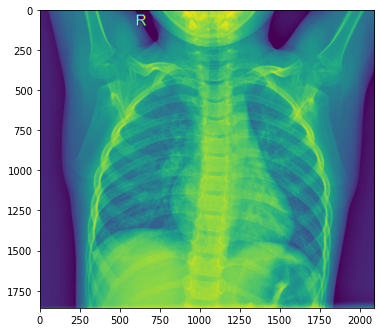

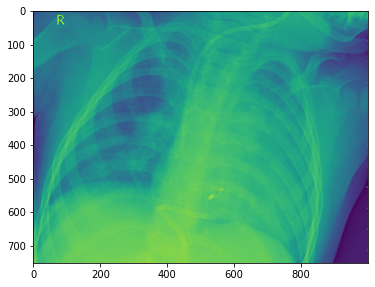

In [ ]:
#Visualize both classes train data
pic_normal = imageio.imread('/content/drive/My Drive/train_xray/normal/IM-0115-0001.jpeg')
plt.figure(figsize = (6,6))
plt.imshow(pic_normal)

pic_pneumonia = imageio.imread('/content/drive/My Drive/train_xray/pneumonia/person987_bacteria_2914.jpeg')
plt.figure(figsize = (6,6))
plt.imshow(pic_pneumonia)

In [ ]:
#Visualizing images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#To see 4*4 images in a grid
nrows = 4
ncols = 4
pic_index = 0

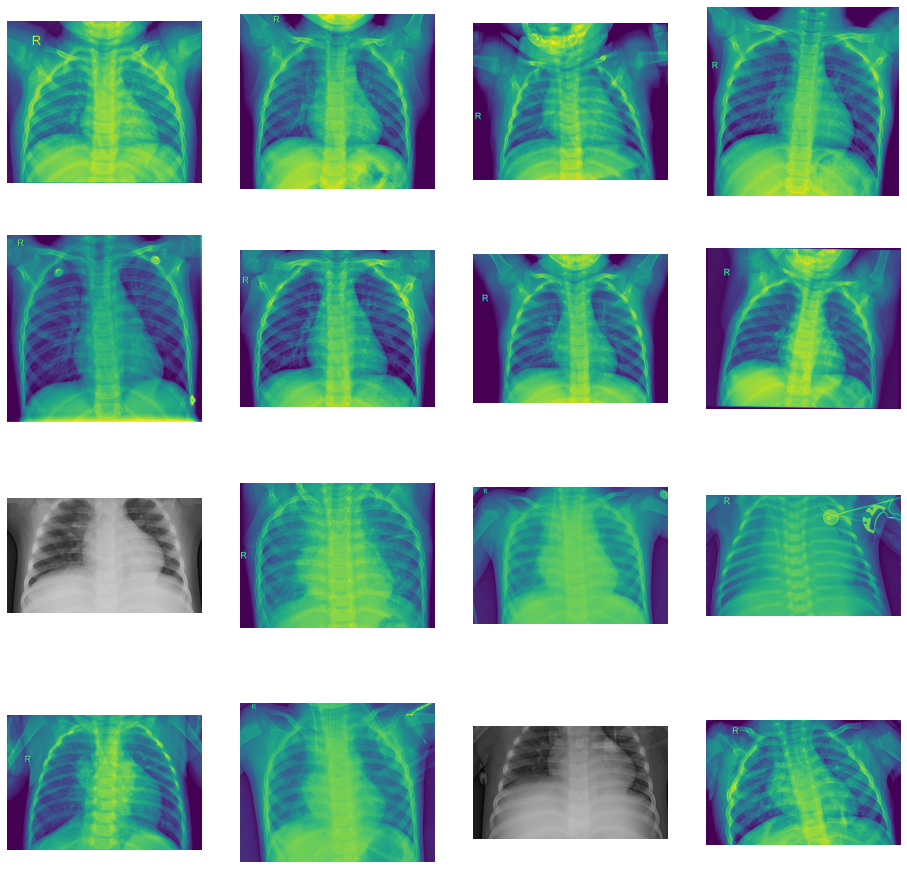

In [ ]:
fig = plt.gcf() 
fig.set_size_inches(ncols * 4, nrows * 4) 
 
pic_index += 8
norm_pix = [os.path.join(train_norm_dir, filename) for filename in normal[pic_index-8:pic_index]]
pnm_pix = [os.path.join(train_pneu_dir, filename) for filename in pnm[pic_index-8:pic_index]]

for i, img_path in enumerate(norm_pix+pnm_pix): 
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("Off")
  
  img = mpimg.imread(img_path)   
  plt.imshow(img) 
 
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rescaled = ImageDataGenerator(1/255)
train_fed = rescaled.flow_from_directory('/content/drive/My Drive/train_xray', target_size = (300,300),
                                         batch_size = 128, class_mode = 'binary')
test_fed = rescaled.flow_from_directory('/content/drive/My Drive/test_xray', target_size = (300,300),
                                        batch_size = 128, class_mode = 'binary')

Found 5226 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
#Model1 architecture
model1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model1.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=0.001), metrics = ['accuracy'])

In [ ]:
hist1 = model1.fit(train_fed, steps_per_epoch= 40, epochs=40, validation_data = test_fed, verbose = 2)
#An epoch mean an iteration over all train data, steps_per_epoch = len of train_data / batch_size

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
40/40 - 591s - loss: 0.2284 - accuracy: 0.9419 - val_loss: 1.9004 - val_accuracy: 0.7131
Epoch 2/40
40/40 - 82s - loss: 0.1492 - accuracy: 0.9508 - val_loss: 1.1544 - val_accuracy: 0.7772
Epoch 3/40
40/40 - 83s - loss: 0.0785 - accuracy: 0.9729 - val_loss: 1.5835 - val_accuracy: 0.7228
Epoch 4/40
40/40 - 83s - loss: 0.0857 - accuracy: 0.9688 - val_loss: 1.1811 - val_accuracy: 0.8093
Epoch 5/40
40/40 - 82s - loss: 0.0511 - accuracy: 0.9796 - val_loss: 0.7824 - val_accuracy: 0.7965
Epoch 6/40
40/40 - 82s - loss: 0.0627 - accuracy: 0.9796 - val_loss: 1.4805 - val_accuracy: 0.7564
Epoch 7/40
40/40 - 82s - loss: 0.0874 - accuracy: 0.9770 - val_loss: 1.6885 - val_accuracy: 0.7532
Epoch 8/40
40/40 - 83s - loss: 0.1899 - accuracy: 0.9808 - val_loss: 3.3479 - val_accuracy: 0.7260
Epoch 9/40
40/40 - 82s - loss: 0.0342 - accuracy: 0.9929 - val_loss: 2.7120 - val_accuracy: 0.7756
Epoch 10/40
40/40 - 80s - loss: 0.0166 - accuracy: 0.9939 - val_loss: 3.7050 - val_accuracy: 0.7676
Epoch 11

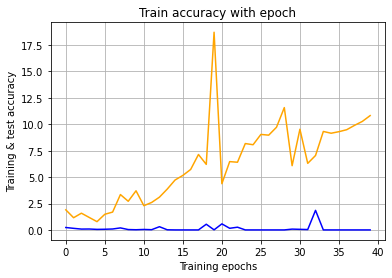

In [ ]:
#Plotting results
plt.plot(hist1.history['loss'],  color = 'blue', label = "train")
plt.plot(hist1.history['val_loss'],  color = 'orange', label = "test")
plt.grid(True)
plt.title("Train accuracy with epoch")
plt.xlabel("Training epochs")
plt.ylabel("Training & test accuracy")
plt.show()

In [ ]:
acc = model1.evaluate (test_fed, steps=len(test_fed), verbose=0)
print('%.2f' % (acc[1] * 100)) #Gives accuracy of 75.96%

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


75.96


In [ ]:
#Model2: Four block VGG model with SGD
model2 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [ ]:
#Model2 with SGD
from tensorflow.keras.optimizers import SGD
model2.compile(loss = 'binary_crossentropy', optimizer = SGD(lr=0.001), metrics = ['accuracy'])

In [ ]:
#Model2 with 40 epochs and 
hist2 = model2.fit_generator(train_fed, steps_per_epoch= 40, validation_data = test_fed, 
                           validation_steps = len(test_fed), epochs=40, verbose = 2)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
40/40 - 79s - loss: 0.8819 - accuracy: 0.7681 - val_loss: 0.4535 - val_accuracy: 0.8269
Epoch 2/40
40/40 - 79s - loss: 0.3295 - accuracy: 0.8603 - val_loss: 0.5293 - val_accuracy: 0.7276
Epoch 3/40
40/40 - 80s - loss: 0.2454 - accuracy: 0.9058 - val_loss: 0.4437 - val_accuracy: 0.7853
Epoch 4/40
40/40 - 80s - loss: 0.2067 - accuracy: 0.9209 - val_loss: 0.3114 - val_accuracy: 0.8718
Epoch 5/40
40/40 - 80s - loss: 0.1804 - accuracy: 0.9310 - val_loss: 0.3819 - val_accuracy: 0.8333
Epoch 6/40
40/40 - 79s - loss: 0.1499 - accuracy: 0.9474 - val_loss: 0.7421 - val_accuracy: 0.7019
Epoch 7/40
40/40 - 80s - loss: 0.1365 - accuracy: 0.9508 - val_loss: 0.7529 - val_accuracy: 0.7131
Epoch 8/40
40/40 - 79s - loss: 0.1179 - accuracy: 0.9572 - val_loss: 0.7408 - val_accuracy: 0.7147
Epoch 9/40
40/40 - 79s - loss: 0.1135 - accuracy: 0.9616 - val_loss: 0.4839 - val_accuracy: 0.8109
Epoch 10/40
40/40 - 79s - loss: 0.1047 - accuracy: 0.9604 - val_loss: 0.5553 - val_accuracy: 0.7821
Epoch 11/

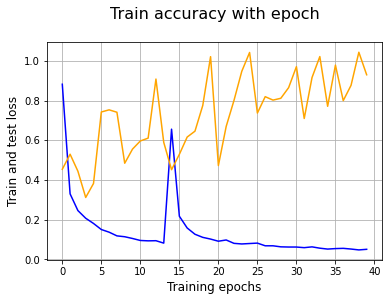

In [ ]:
#Plotting results
plt.plot(hist2.history['loss'],  color = 'blue', label = "train")
plt.plot(hist2.history['val_loss'],  color = 'orange', label = "test")
plt.grid(True)
plt.title("Train accuracy with epoch\n", fontsize = 16)
plt.xlabel("Training epochs", fontsize = 12)
plt.ylabel("Train and test loss", fontsize = 12)
plt.show()

In [ ]:
#Print accuracy
acc2 = model2.evaluate (test_fed, steps=len(test_fed), verbose=0)
print('%.2f' % (acc2[1] * 100)) #Gives 75.48%

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


75.48


In [ ]:
#Model3: Four layer
model3 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [ ]:
#Model with Adam
from tensorflow.keras.optimizers import Adam
model3.compile(loss = 'binary_crossentropy', optimizer = Adam(lr=0.0001), metrics = ['accuracy'])

In [ ]:
#Model3 with 40 epochs
hist3 = model3.fit(train_fed, steps_per_epoch= 40, validation_data = test_fed, 
                           validation_steps = len(test_fed), epochs=22, verbose = 2)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/22
40/40 - 1139s - loss: 0.1380 - accuracy: 0.9482 - val_loss: 1.1893 - val_accuracy: 0.6747
Epoch 2/22
40/40 - 78s - loss: 0.0921 - accuracy: 0.9684 - val_loss: 1.1495 - val_accuracy: 0.6971
Epoch 3/22
40/40 - 77s - loss: 0.0598 - accuracy: 0.9804 - val_loss: 0.9046 - val_accuracy: 0.7580
Epoch 4/22
40/40 - 77s - loss: 0.0537 - accuracy: 0.9821 - val_loss: 1.4428 - val_accuracy: 0.6939
Epoch 5/22
40/40 - 78s - loss: 0.0418 - accuracy: 0.9853 - val_loss: 1.0264 - val_accuracy: 0.7532
Epoch 6/22
40/40 - 77s - loss: 0.0358 - accuracy: 0.9863 - val_loss: 1.1479 - val_accuracy: 0.7436
Epoch 7/22
40/40 - 78s - loss: 0.0251 - accuracy: 0.9922 - val_loss: 1.0480 - val_accuracy: 0.7628
Epoch 8/22
40/40 - 77s - loss: 0.0140 - accuracy: 0.9978 - val_loss: 1.3441 - val_accuracy: 0.7388
Epoch 9/22
40/40 - 76s - loss: 0.0117 - accuracy: 0.9978 - val_loss: 1.1851 - val_accuracy: 0.7548
Epoch 10/22
40/40 - 76s - loss: 0.0082 - accuracy: 0.9996 - val_loss: 1.5777 - val_accuracy: 0.7308
Epoch 1

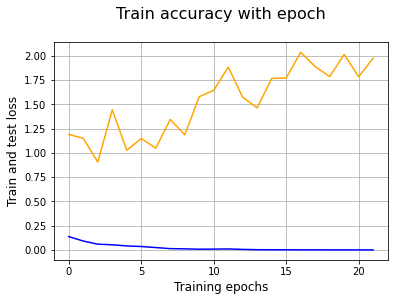

In [ ]:
#Plotting results
plt.plot(hist3.history['loss'],  color = 'blue', label = "train")
plt.plot(hist3.history['val_loss'],  color = 'orange', label = "test")
plt.grid(True)
plt.title("Train accuracy with epoch\n", fontsize = 16)
plt.xlabel("Training epochs", fontsize = 12)
plt.ylabel("Train and test loss", fontsize = 12)
plt.show()

In [ ]:
#Print accuracy
acc3 = model3.evaluate(test_fed, steps=len(test_fed), verbose=0)
print('%.2f' % (acc3[1] * 100)) #74.84%

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


74.84


In [ ]:
#Model4 architecture
model4 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model4.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=0.001), metrics = ['accuracy'])

In [13]:
hist4 = model4.fit(train_fed, steps_per_epoch= 40, epochs=40, validation_data = test_fed, verbose = 2)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
40/40 - 2985s - loss: 0.5634 - accuracy: 0.8293 - val_loss: 0.7159 - val_accuracy: 0.7324
Epoch 2/40
40/40 - 82s - loss: 8.8293 - accuracy: 0.8154 - val_loss: 1.3995 - val_accuracy: 0.7308
Epoch 3/40
40/40 - 80s - loss: 0.8201 - accuracy: 0.8543 - val_loss: 1.1929 - val_accuracy: 0.7308
Epoch 4/40
40/40 - 79s - loss: 9.2073 - accuracy: 0.8456 - val_loss: 0.7395 - val_accuracy: 0.8494
Epoch 5/40
40/40 - 82s - loss: 0.1995 - accuracy: 0.9245 - val_loss: 0.6511 - val_accuracy: 0.8462
Epoch 6/40
40/40 - 80s - loss: 0.6577 - accuracy: 0.9056 - val_loss: 0.7666 - val_accuracy: 0.7997
Epoch 7/40
40/40 - 79s - loss: 7.9740 - accuracy: 0.9335 - val_loss: 1.1214 - val_accuracy: 0.7981
Epoch 8/40
40/40 - 81s - loss: 1.7899 - accuracy: 0.9333 - val_loss: 0.7874 - val_accuracy: 0.7580
Epoch 9/40
40/40 - 80s - loss: 0.3245 - accuracy: 0.9459 - val_loss: 1.7304 - val_accuracy: 0.7324
Epoch 10/40
40/40 - 79s - loss: 0.5860 - accuracy: 0.9521 - val_loss: 2.0095 - val_accuracy: 0.7804
Epoch 1

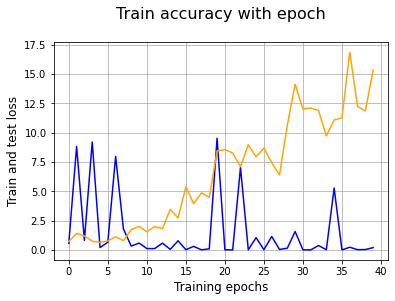

In [14]:
#Plotting results
plt.plot(hist4.history['loss'],  color = 'blue', label = "train")
plt.plot(hist4.history['val_loss'],  color = 'orange', label = "test")
plt.grid(True)
plt.title("Train accuracy with epoch\n", fontsize = 16)
plt.xlabel("Training epochs", fontsize = 12)
plt.ylabel("Train and test loss", fontsize = 12)
plt.show()

In [15]:
#Print accuracy
acc4 = model4.evaluate(test_fed, steps=len(test_fed), verbose=0)
print('%.2f' % (acc4[1] * 100)) #74.84%

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


77.08


In [18]:
val_fed = rescaled.flow_from_directory('/content/drive/My Drive/val_xray', target_size = (300,300))
                                       

Found 16 images belonging to 2 classes.


In [19]:
out = model4.predict(val_fed)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
